In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.shape

(1599, 12)

In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
df.describe().transpose()

count       mean        std      min      25%  \
fixed_acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile_acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric_acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual_sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free_sulfur_dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total_sulfur_dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed_acidity          7.90000   9.200000   15.90000  
volatile_acidity       0.52000   0.640000    1.58000  
citric_acid            0.26000   0.420000    1.00000  
residual_sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free_sulfur_dioxide   14.00000  21.000000   72.00000  
total_sulfur_dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [7]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

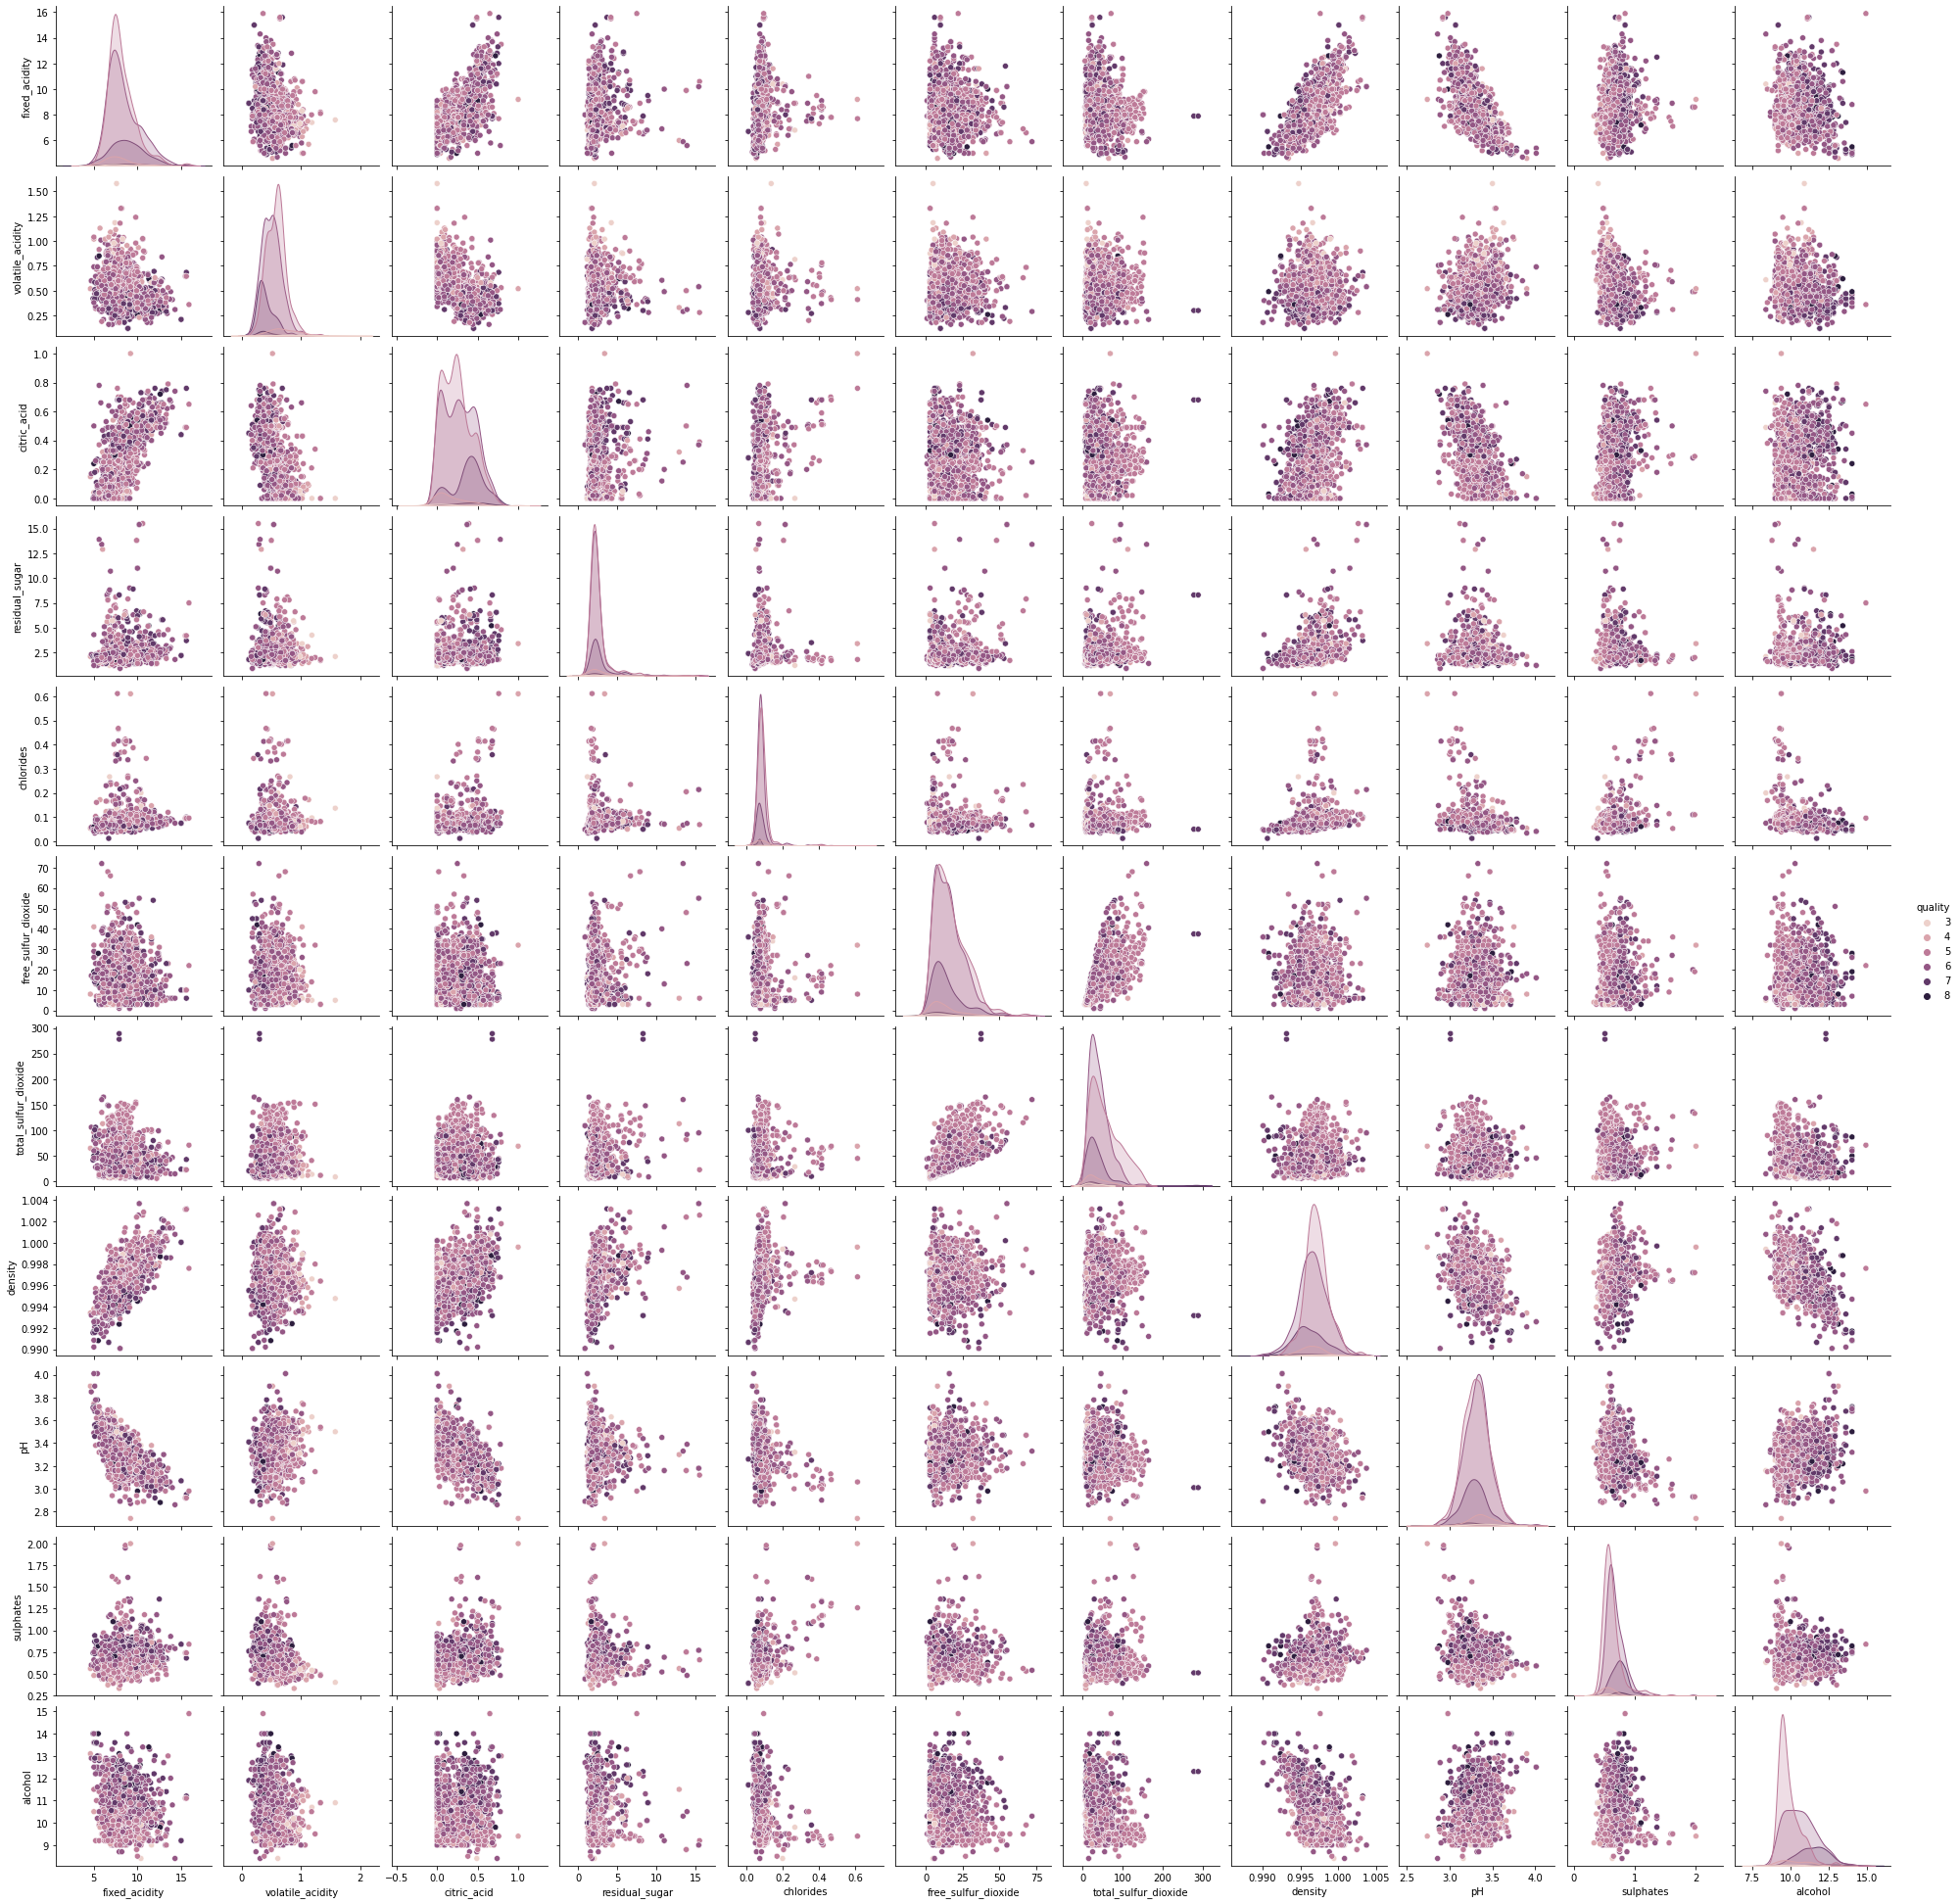

In [11]:
sns.pairplot(df, hue = 'quality', diag_kind = 'kde')

<AxesSubplot:>

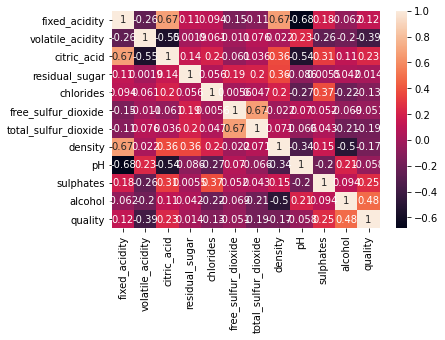

In [12]:
sns.heatmap(df.corr(), annot = True)

In [13]:
px.scatter_matrix(df, color = 'quality')

# Checking for outliers

In [14]:
df['fixed_acidity'].sort_values(ascending = False)

652     15.9
557     15.6
442     15.6
555     15.5
554     15.5
        ... 
94       5.0
1321     5.0
821      4.9
95       4.7
45       4.6
Name: fixed_acidity, Length: 1599, dtype: float64

In [15]:
df['volatile_acidity'].sort_values(ascending = False)

1299    1.580
126     1.330
127     1.330
672     1.240
690     1.185
        ...  
1566    0.160
1286    0.160
950     0.120
949     0.120
948     0.120
Name: volatile_acidity, Length: 1599, dtype: float64

In [16]:
px.box(df['volatile_acidity'])

In [17]:
# Using IQR

q1 = df.volatile_acidity.quantile(0.25)
q3 = df.volatile_acidity.quantile(0.75)
IQR = q3 - q1
low = q1 - 1.5 * IQR
high = q3 + 1.5 * IQR
low , high

(0.015000000000000013, 1.0150000000000001)

In [18]:
# Removing outliers

#df['volatile_acidity_new'] = df[(df['volatile_acidity'].values > low) & (df['volatile_acidity'].values < high)]
#df.drop(((df['volatile_acidity'].values > low) & (df['volatile_acidity'].values < high)), inplace = True)
df.drop(df[df.volatile_acidity < low].index, inplace = True)
df.drop(df[df['volatile_acidity'] > high].index, inplace = True)

In [19]:
px.box(df['volatile_acidity'])

In [20]:
px.box(df['fixed_acidity'])

In [21]:
q1 = df.fixed_acidity.quantile(0.25)
q3 = df.fixed_acidity.quantile(0.75)
IQR = q3 - q1
low = q1 - 1.5 * IQR
high = q3 + 1.5 * IQR
df.drop(df[df.fixed_acidity < low].index, inplace = True)
df.drop(df[df.fixed_acidity > high].index, inplace = True)

In [22]:
px.box(df['fixed_acidity'])

In [23]:
px.box(df['fixed_acidity'], df['volatile_acidity'])

In [24]:
df.shape

(1531, 12)

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_score
from sklearn import metrics

In [26]:
# Separating independent and dependent variables

x = df.drop(['quality', 'fixed_acidity', 'free_sulfur_dioxide', 'total_sulfur_dioxide'], axis = 1)
y = df['quality']

In [27]:
# Splitting the training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [28]:
# Training the model

nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [30]:
# Calculating model accuracy

print ('Model accuracy: {}%'.format(round((nb.score(x_test, y_test) * 100), 2)))

Model accuracy: 55.22%
